In [21]:
from surface_distribution import plot_surface_dist
import numpy as np
import matplotlib.pyplot as plt

Processing WeiH: 100%|██████████| 5500/5500 [02:15<00:00, 40.61it/s]


for WeiH domain, 5% have less than 1280.0 of surface and more than 5% have surface grater than 123065.59999999963. min area = 32, max area = 441440


Processing I3: 100%|██████████| 11948/11948 [04:53<00:00, 40.71it/s]


for I3 domain, 5% have less than 3510.4000000000015 of surface and more than 5% have surface grater than 571423.9999999995. min area = 32, max area = 1278496


Processing LW4: 100%|██████████| 15953/15953 [06:25<00:00, 41.35it/s]


for LW4 domain, 5% have less than 3808.0 of surface and more than 5% have surface grater than 314569.59999999986. min area = 32, max area = 662368


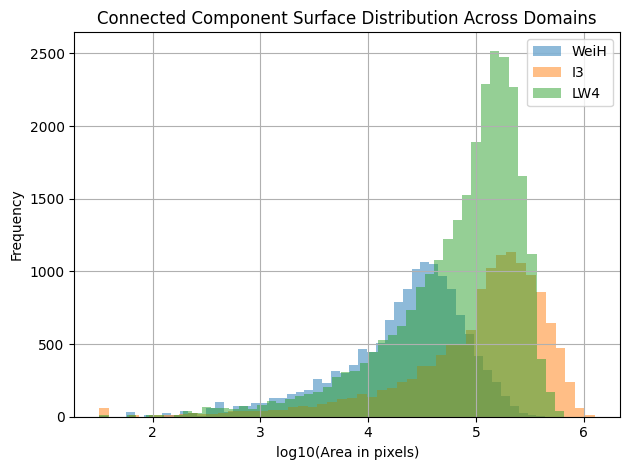

Suggested zoom interval: [0.34, 7.16]


In [ ]:
# for shape 2048 * 1024
plot_surface_dist(["WeiH","I3","LW4"])

Processing WeiH: 100%|██████████| 5500/5500 [00:08<00:00, 662.61it/s]


for WeiH domain, 5% have less than 40.0 of surface and more than 5% have surface grater than 3845.7999999999884. min area = 1, max area = 13795


Processing I3: 100%|██████████| 11948/11948 [00:25<00:00, 461.76it/s]


for I3 domain, 5% have less than 109.70000000000005 of surface and more than 5% have surface grater than 17856.999999999985. min area = 1, max area = 39953


Processing LW4: 100%|██████████| 15953/15953 [00:34<00:00, 465.86it/s]


for LW4 domain, 5% have less than 119.0 of surface and more than 5% have surface grater than 9830.299999999996. min area = 1, max area = 20699


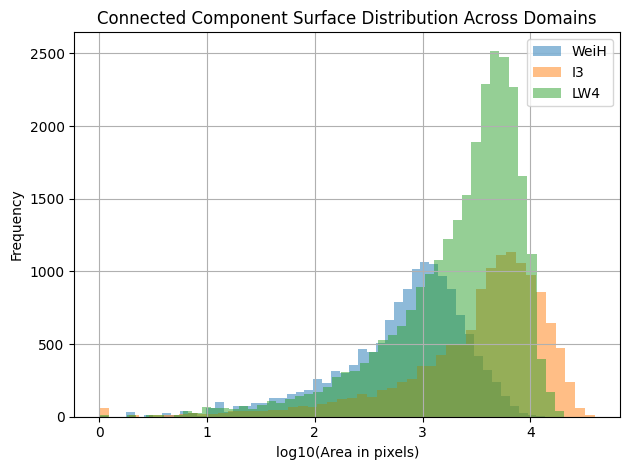

Suggested zoom interval: [1.92, 40.48]


In [3]:
# for shape 256 * 256
plot_surface_dist(["WeiH","I3","LW4"])

In [79]:
original_shape = 256*256
min_area = 10 ** 3
max_area = 10 ** 4
print(f"min area take {min_area / original_shape * 100:.2f}%, and max area take {max_area / original_shape * 100:.2f}% of the 256 * 256 image")

min area take 1.53%, and max area take 15.26% of the 256 * 256 image


In [80]:
# to take max_area of the image
target_area = max_area

zoom_min = np.sqrt(target_area / max_area)

zoom_max = np.sqrt(target_area / min_area)

zoom_min,zoom_max

(1.0, 3.1622776601683795)

In [24]:
from mmseg.datasets.pipelines import Compose
from mmcv import Config
from PIL import Image
import os


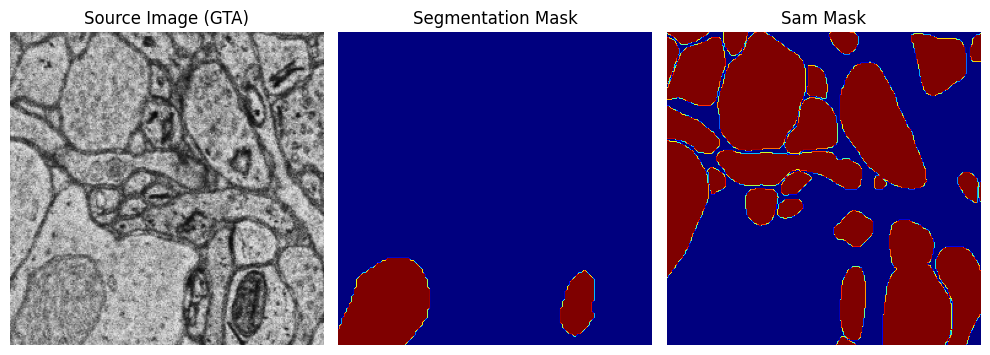

In [59]:

# Change this to match your actual path
img_path = 'data/WeiH/images/3.png'
mask_path = 'data/WeiH/labels/3.png'
sam_path = 'data/WeiH/sam/3.png'

# Load image and mask
image = Image.open(img_path).convert('RGB')
mask = Image.open(mask_path)
sam = Image.open(sam_path)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Source Image (GTA)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='jet')  
plt.title("Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sam, cmap='jet')  
plt.title("Sam Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
# Load your config file
cfg = Config.fromfile('configs/_base_/datasets/uda_WeiH_to_LW4.py')

# Build pipeline
pipeline = Compose(cfg.data.train.source.pipeline)

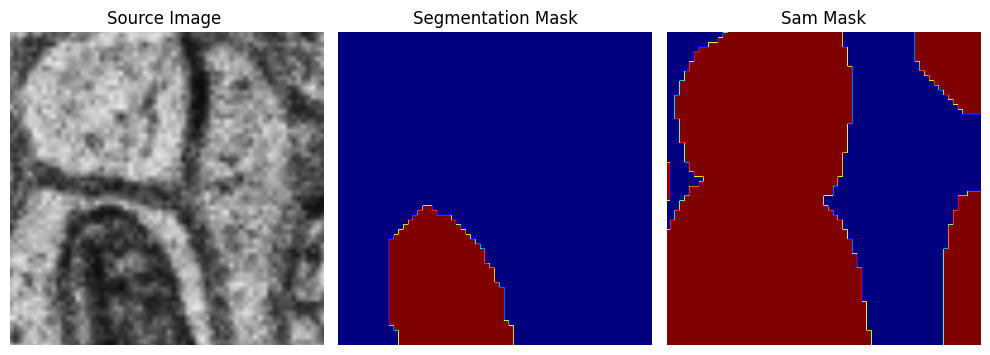

In [73]:
# Load a sample
data = dict(
    img_info=dict(filename='images/3.png'),
    ann_info=dict(seg_map='labels/3.png'),
    img_prefix='data/WeiH',
    seg_prefix='data/WeiH',
    pseudo_label_prefix='data/WeiH',  # <--- Add this
    pseudo_label='sam/3.png',                              # <--- And this
    seg_fields=[],
    sam_fields=[]
)

# Apply pipeline
processed = pipeline(data)

# Visualize processed['img'] and processed['gt_semantic_seg']
import torch
import numpy as np

img = processed['img'].data.numpy().transpose(1, 2, 0)  # [C, H, W] -> [H, W, C]
img = (img * cfg.img_norm_cfg['std']) + cfg.img_norm_cfg['mean']  # denormalize
img = img.astype(np.uint8)

mask = processed['gt_semantic_seg'].data.squeeze().numpy()

sam = processed["sam_pseudo_label"].data.squeeze().numpy()

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Source Image ")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='jet')  
plt.title("Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sam, cmap='jet')  
plt.title("Sam Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
